### computer_vision_project.ipynb

In [1]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

In [2]:
import tensorflow_datasets as tfds

## TensorFlow Datasets
### 사전에 만들어 놓은 머신러닝 데이터셋을 모아둔 것

* 텐서로 이미 데이터를 준비
* 잘 준비된 데이터 정리된 데이터로 실습을 할 수 있다
* 여러가지 데이터 불러오는 방법을 실습할 수 있다.
* 텐서플로 버전이 바뀌면서 새롭게 생기거나 변경된 경우에 빠르게 이 데이터셋으로 테스트를 할 수 있다. 

In [3]:
dataset_list = tfds.list_builders()
print("food101" in dataset_list)

True


In [4]:
(train_data, test_data), dataset_info = tfds.load(
    name="food101", # 우리가 사용할 데이터셋 지정
    split=["train", "validation"],  # 데이터셋 나누는 부분
    shuffle_files=True,  # 파일들을 섞어 줄것인지 default = False
    as_supervised=True, # tuple 형태 (data, label) 로 데이터를 다운로드 할 것인지 여부 / False면 dictionary 형태
    with_info=True, # 데이터셋의 메타 정보도 다운로드 (라벨, 샘플의 갯수 등등)
    download=False)

### Windows의 경우 C:\Users\[자신의 아이디]\tensorflow_datasets 에 다운로드 한 후 압축 해제

In [5]:
dataset_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [6]:
class_names = dataset_info.features["label"].names
len(class_names)

101

In [7]:
train_one_sample = train_data.take(1) # (image_tensor, label) 왜? as_supervised=True 로 설정을 했기 때문에

In [8]:
train_one_sample

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [9]:
type(train_one_sample)

tensorflow.python.data.ops.dataset_ops.TakeDataset

In [10]:
for image, label in train_one_sample:
    print(f"Image shape : {image.shape}")
    print(f"Image dtype : {image.dtype}")
    print(f"Target class : {label}")
    print(f"Class name : {class_names[label.numpy()]}")

Image shape : (512, 512, 3)
Image dtype : <dtype: 'uint8'>
Target class : 41
Class name : french_onion_soup


In [11]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[168, 148, 123],
        [192, 172, 147],
        [200, 180, 155],
        ...,
        [179, 165, 139],
        [188, 172, 147],
        [154, 138, 113]],

       [[184, 164, 139],
        [209, 189, 164],
        [212, 192, 167],
        ...,
        [207, 193, 167],
        [218, 202, 177],
        [184, 168, 143]],

       [[186, 166, 139],
        [214, 194, 167],
        [211, 194, 168],
        ...,
        [207, 193, 167],
        [217, 203, 177],
        [180, 166, 140]],

       ...,

       [[206, 198, 179],
        [236, 228, 209],
        [230, 221, 204],
        ...,
        [226, 214, 200],
        [239, 227, 211],
        [203, 191, 175]],

       [[216, 208, 187],
        [239, 231, 210],
        [233, 225, 206],
        ...,
        [227, 215, 201],
        [237, 225, 209],
        [205, 193, 177]],

       [[173, 165, 144],
        [198, 190, 169],
        [204, 196, 177],
        ...,
        [197, 185, 17

In [12]:
type(image)

tensorflow.python.framework.ops.EagerTensor

In [12]:
image.ndim

3

In [13]:
import tensorflow as tf

In [14]:
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

(-0.5, 511.5, 511.5, -0.5)

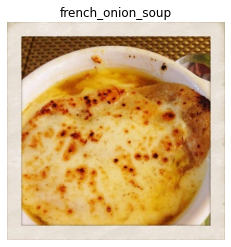

In [15]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

In [16]:
def preprocess_img(image, label, img_shape = 224):
    image = tf.image.resize(image, [img_shape, img_shape])
    return tf.cast(image, tf.float32), label

In [17]:
preprocessed_img = preprocess_img(image, label)[0]

In [18]:
print(f"{image[:2]} {image.shape} {image.dtype}")
print(f"{preprocessed_img[:2]} {preprocessed_img.shape} {preprocessed_img.dtype}")

[[[168 148 123]
  [192 172 147]
  [200 180 155]
  ...
  [179 165 139]
  [188 172 147]
  [154 138 113]]

 [[184 164 139]
  [209 189 164]
  [212 192 167]
  ...
  [207 193 167]
  [218 202 177]
  [184 168 143]]] (512, 512, 3) <dtype: 'uint8'>
[[[194.12755 174.12755 149.12755]
  [204.66325 184.66325 159.66325]
  [198.20918 180.42348 158.85204]
  ...
  [200.12253 186.55106 160.97958]
  [204.22949 190.22949 164.22949]
  [195.14168 179.14168 154.14168]]

 [[197.10204 177.10204 150.10204]
  [202.5102  185.5102  159.5102 ]
  [209.96428 193.83673 169.47958]
  ...
  [201.301   187.72952 162.15805]
  [207.8622  193.8622  167.8622 ]
  [197.218   183.218   157.218  ]]] (224, 224, 3) <dtype: 'float32'>


In [19]:
print(f"{image.shape}")
print(f"{preprocessed_img.shape}")

(512, 512, 3)
(224, 224, 3)


In [20]:
print(f"{image.dtype}")
print(f"{preprocessed_img.dtype}")

<dtype: 'uint8'>
<dtype: 'float32'>


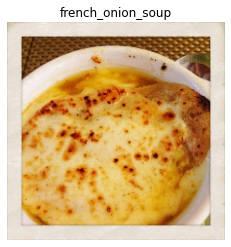

In [21]:
plt.imshow(preprocessed_img/255.)
plt.title(class_names[label])
plt.axis(False);

### 현재 우리가 가지고 있는 이미지 데이터는 총 101,000개 입니다. (학습용 및 테스트용 모두 합친 것)
### batch를 잘 고려해야하는 상황! => 메모리를 효율적으로 사용할 수 있기 때문에!

### 101,000개 이미지와 라벨 정보를 32개 이미지와 라벨 정보로 구분해서 처리

### tf.data API의 메서드들을 사용!

[tf data API](https://www.tensorflow.org/guide/data_performance)


* map()
* shuffler()
* batch()
* prefetch()
* cache()

## 배치로 처리할 때 고려해야 할 사항
1. 다른 shape의 텐서들을 배치로 처리할 수 없습니다. 이미지 resize와 같은 것을 처리!

2. shuffle()는 섞을 이미지의 수를 유지를 합니다. 이 때 shuffle의 대상은 학습 데이터의 모두 이미지가 대상

   학습 데이터의 크기가 크다면, 메모리에 효율적 사용이 어렵다. 1,000이나 10,000로 사용하는 것도 나쁘지는 않다.


3. num_parallel_calls 파라미터를 사용할 수 있는 메서드에서는 성능을 개선시킬 수 있습니다. num_parallel_calls = tf.data.AUTORUNE 설정!


4. 데이터셋이 메모리게 잘 맞으면 cache()를 사용할 수 없습니다.

![이미지](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/07-prefetching-from-hands-on-ml.png)

## 일반적인 작업 순서
origianl dataset -> map() -> shuffle() -> batch() -> prefetch() -> PrefetchDataset

In [24]:
train_data = train_data.map(
    map_func = preprocess_img,
    num_parallel_calls = tf.data.AUTOTUNE
)

train_data = train_data.shuffle(buffer_size = 1000).batch(batch_size=32).prefetch(tf.data.AUTOTUNE)

test_data = test_data.map(
    map_func = preprocess_img,
    num_parallel_calls = tf.data.AUTOTUNE
)

test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

ValueError: in user code:

    <ipython-input-16-2a51659dc26c>:2 preprocess_img  *
        image = tf.image.resize(image, [img_shape, img_shape])
    c:\20210626\venv\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper  **
        return target(*args, **kwargs)
    c:\20210626\venv\lib\site-packages\tensorflow\python\ops\image_ops_impl.py:1717 resize_images_v2
        return _resize_images_common(
    c:\20210626\venv\lib\site-packages\tensorflow\python\ops\image_ops_impl.py:1396 _resize_images_common
        raise ValueError('\'images\' must have either 3 or 4 dimensions.')

    ValueError: 'images' must have either 3 or 4 dimensions.


In [25]:
train_data, test_data

(<PrefetchDataset shapes: ((None, None, 224, 224, 3), (None, None)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, None, 224, 224, 3), (None, None)), types: (tf.float32, tf.int64)>)

In [26]:
checkpoint_path = "model_checkpoint/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor = "val_acc",
    save_best_only = True,
    save_weight_only = True,
    verbose = 0
)